In [76]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
belize = pd.read_csv('belize_airbnb_listings.csv')
b_con = belize.drop(columns = {'name', 'host_name', 'host_id', 'neighbourhood_group', 'neighbourhood', 'room_type', 'last_review'})
b_con = b_con.dropna()
b_con.head(1)

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,36666,17.74786,-88.02398,141,3,250,2.0,5,225


In [78]:
np.corrcoef(b_con['number_of_reviews'], b_con['reviews_per_month'])[0,1]

0.8496655400224561

In [79]:
ss.pearsonr(b_con['number_of_reviews'], b_con['reviews_per_month'])[0]

0.8496655400224563

In [80]:
ss.spearmanr(b_con['number_of_reviews'], b_con['reviews_per_month'])[0]
ss.spearmanr(b_con['number_of_reviews'], b_con['reviews_per_month']).correlation

0.8916017342328019

In [81]:
ss.kendalltau(b_con['number_of_reviews'], b_con['reviews_per_month'])[0]
ss.kendalltau(b_con['number_of_reviews'], b_con['reviews_per_month']).correlation

0.7478140384936347

In [82]:
r, p = ss.pearsonr(b_con['number_of_reviews'], b_con['reviews_per_month'])
r, p

(0.8496655400224563, 0.0)

In [83]:
b_con['number_of_reviews'].corr(b_con['reviews_per_month'])

0.8496655400224561

In [84]:
b_con['number_of_reviews'].corr(b_con['reviews_per_month'], method = 'spearman')

0.8916017342328019

In [85]:
b_con['number_of_reviews'].corr(b_con['reviews_per_month'], method = 'kendall')

0.7478140384936347

In [86]:
result = ss.linregress(b_con['number_of_reviews'], b_con['reviews_per_month'])

In [87]:
result

LinregressResult(slope=0.015943596104859067, intercept=0.18211458243670464, rvalue=0.849665540022456, pvalue=0.0, stderr=0.0002327099429686509, intercept_stderr=0.00971551520601244)

In [88]:
result.slope

0.015943596104859067

In [89]:
result.intercept

0.18211458243670464

In [90]:
result.pvalue

0.0

In [91]:
result.rvalue

0.849665540022456

In [92]:
np.corrcoef([b_con['number_of_reviews'], b_con['reviews_per_month'], b_con['availability_365']])

array([[ 1.        ,  0.84966554, -0.0142113 ],
       [ 0.84966554,  1.        , -0.03247795],
       [-0.0142113 , -0.03247795,  1.        ]])

In [93]:
transp = np.array([b_con['number_of_reviews'], b_con['reviews_per_month'], b_con['availability_365']]).T

In [94]:
np.corrcoef(transp, rowvar = False)

array([[ 1.        ,  0.84966554, -0.0142113 ],
       [ 0.84966554,  1.        , -0.03247795],
       [-0.0142113 , -0.03247795,  1.        ]])

In [95]:
b_con.head(1)

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,36666,17.74786,-88.02398,141,3,250,2.0,5,225


In [96]:
xy = b_con.drop(columns = {'id', 'latitude', 'longitude', 'price', 'minimum_nights', 'calculated_host_listings_count', 'availability_365'})

In [97]:
corr_matrix = xy.corr()

In [98]:
corr_matrix

,number_of_reviews,reviews_per_month
number_of_reviews,1.000000,0.849666
reviews_per_month,0.849666,1.000000


In [99]:
xy.corrwith(b_con['id'])

number_of_reviews   -0.415392
reviews_per_month   -0.121845
dtype: float64

In [100]:
x = np.array(b_con['number_of_reviews'])
y = np.array(b_con['reviews_per_month'])

In [101]:
x_rank = ss.rankdata(x)
y_rank = ss.rankdata(y)

In [102]:
x_rank

array([1808. , 1810. , 1407. , ...,  493.5,  129.5,  129.5])

In [103]:
transp

array([[250.  ,   2.  , 225.  ],
       [316.  ,   2.46, 164.  ],
       [ 30.  ,   0.78, 364.  ],
       ...,
       [  3.  ,   3.  , 334.  ],
       [  1.  ,   0.91, 364.  ],
       [  1.  ,   1.  , 323.  ]])

In [104]:
corr_matrix, r_matrix = ss.spearmanr(transp) #multidimensional is OK

In [105]:
corr_matrix

array([[ 1.        ,  0.89160173, -0.04465703],
       [ 0.89160173,  1.        , -0.04502418],
       [-0.04465703, -0.04502418,  1.        ]])

In [106]:
r_matrix

array([[0.       , 0.       , 0.0574951],
       [0.       , 0.       , 0.055472 ],
       [0.0574951, 0.055472 , 0.       ]])

In [107]:
tau, p = ss.kendalltau(x,y) #flattens multidimensional arrays

In [108]:
xy.corr(method = 'spearman')

,number_of_reviews,reviews_per_month
number_of_reviews,1.000000,0.891602
reviews_per_month,0.891602,1.000000


In [109]:
xy.corr(method = 'kendall')

,number_of_reviews,reviews_per_month
number_of_reviews,1.000000,0.747814
reviews_per_month,0.747814,1.000000


In [117]:
xy.head(1)

,number_of_reviews,reviews_per_month
0,250,2.0


In [121]:
slope, intercept, r, p, stderr = ss.linregress(xy)
line = f'Regression line: y = {slope: .2f}x + {intercept: .2f}, r = {r:.2f}'
line

'Regression line: y =  0.02x +  0.18, r = 0.85'

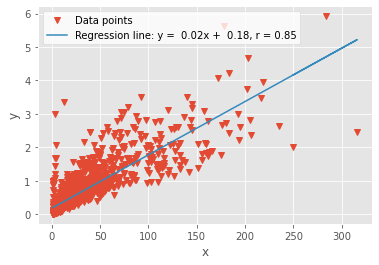

In [122]:
plt.style.use('ggplot')

fig, ax = plt.subplots()
ax.plot(xy['number_of_reviews'], xy['reviews_per_month'], linewidth = 0, marker = 'v', label = 'Data points' )
ax.plot(x, intercept + slope*x, label = line)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(facecolor = 'white')
plt.show()

In [130]:
xyz = b_con.drop(columns = {'id', 'latitude', 'longitude', 'minimum_nights', 'calculated_host_listings_count', 'availability_365'})
xyz.head(1)

,price,number_of_reviews,reviews_per_month
0,141,250,2.0


In [135]:
corr_matrix = xyz.corr().round(2)
corr_matrix

,price,number_of_reviews,reviews_per_month
price,1.00,-0.13,-0.16
number_of_reviews,-0.13,1.00,0.85
reviews_per_month,-0.16,0.85,1.00


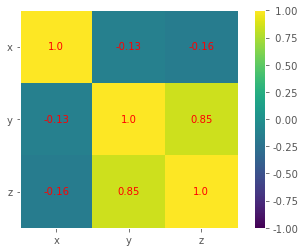

In [145]:
fig, ax = plt.subplots()
im = ax.imshow(corr_matrix)
im.set_clim(-1, 1)
ax.grid(False)
ax.xaxis.set(ticks = (0,1,2), ticklabels = ('x', 'y', 'z'))
ax.yaxis.set(ticks = (0,1,2), ticklabels = ('x', 'y', 'z'))
ax.set_ylim(2.5, -0.5)
for i in range(3):
    for j in range(3):
        ax.text(j, i, corr_matrix.iloc[i,j], ha = 'center', va = 'center', color = 'r')
cbar = ax.figure.colorbar(im, ax = ax, format = '% .2f')
plt.show()